## 動作確認していただきたいこと
フォルダ "trotter_expo_coeff_gr" に以下の Error plt セクションで、得られるフィッティング結果を保存し、そのデータを使って extrapolation セクションで外挿を行う。その結果が論文の FIG.1, FIG.2 と同様の結果が得られることを確認していただきたいです。

流れとしては、**Error plt** で $H_2$~$H_6$($H_5$まででも可) までのフィッティングを下記の6つの積公式で行う。その結果がフォルダ "trotter_expo_coeff_gr" に保存されるので、**extrapolation** で比較する積公式を指定して、外挿する。論文の FIG.1 では、(2次, 4次, 8次(Yoshida), 8次(Morales), 10次(Morales)) を比較。FIG.2 では (4次(新構築), 8次(Morales)) を比較。

フォルダ "trotter_expo_coeff_gr_original" には論文で使用しているデータが入っているので、そのデータを "trotter_expo_coeff_gr" にコピペしていただければ論文と同じ外挿が得られます。


## Trotter project

### ハミルトニアン基底エネルギーの計算 (t 決定用)

In [ ]:
import trotter_error_plt as tep
import numpy as np

Hchain = 15 # H-chain の原子数
jw_hamiltonian, E, ham_name, num_qubits = tep.jw_hamiltonian_maker(Hchain)
print(E)
print(f'Et = -π/4 を満たす t = {- np.pi / (4 * E) }')
print(f'Et = -3π/4 を満たす t = {- np.pi*3 / (4 * E) }')
print(f'Et = -5π/4 を満たす t = {- np.pi*5 / (4 * E) }')

### **Error plt**

#### t の値：
Et = ± $\pi$ / 2 となるような t は避ける。経験的に、小数点1桁離せばほぼ直線となる。目安として Et  $\sim n * \pi$ / 4 となるような t を選んだ。  
高次の積公式では、Et  $\sim \pi$ / 4 だと、誤差がマシンイプシロンに引っかかるため、 Et  $\sim 3 * \pi$ / 4 などに調整。Morales の積公式は $\sim 3 * \pi$ / 4 推奨  
ステップ幅は t の 0.002 程度


#### t の例 （Morales 以外, Morales）
$H_2$ : 0.73, 2.21  
$H_3$ : 0.75, 2.27  
$H_4$ : 0.37, 1.12  
$H_5$ : 0.36, 1.08  
$H_6$ : 0.25, 1.25  
$H_7$ : 0.23, 1.19  
$H_{8}$ : 0.18, 0.94   
$H_{9}$ : 0.18, 0.90  
$H_{10}$ : 0.15, 0.75  
$H_{11}$ : 0.14, 0.72  
$H_{12}$ : 0.12, 0.62  
$H_{13}$ : 0.12, 0.60   
$H_{14}$ : 0.10, 0.53   
$H_{15}$ : 0.10, 0.51  


#### 積公式の種類表記(num_w)：
2nd : 2次,  
4th : 4次,  
8th(Yoshida) : Yoshidaの8次,  
8th(Morales) : Moralesらの8次(m=8),  
10th(Morales) : Moralesらの10次(m=16),  
4th(new_2) : 新構築4次(係数2個),  



#### フィッティング結果(データ保存)：
ディレクトリ : "trotter_expo_coeff_gr" に保存される。保存されるのは、誤差 $\alpha t^p$ のスケーリングを、$\alpha, p$ の両方で行ったもの、と $p$ を次数で固定し、$\alpha$ だけでスケーリングしたもの。  
保存名は、"｛ハミルトニアンの情報｝＿｛num_w｝＿｛$p$ を固定しているのであれば ave｝"  
ハミルトニアン:H3, 使用積公式:4次, $p$ の固定ありの場合の保存名例:  
H3_sto-3g_triplet_1+_distance_100_charge_1_grouping_Operator_4th_ave  
**変数'avestrage=True'とすることでフィッティング結果を保存する。外挿を行う。**

ローカル CPU だと $H_7$ あたりが限界

H7_sto-3g_triplet_1+_distance_100_charge_1
converged SCF energy = -3.28116372032991
sum of all grouped terms == original Hamiltonian?
diffinision0
True
validation of the group:
energy_-3.035816265019824
error exponent :[3.3129501]
error coefficient :[7.47577318e-05]
r^2 (log-log): 0.999998790822717
データを /home/abe/myproject/Evaluation_numGate_highorder/trotter_expo_coeff_gr/H7_sto-3g_triplet_1+_distance_100_charge_1_grouping_Operator_4th(new_2) に保存しました。
データを /home/abe/myproject/Evaluation_numGate_highorder/trotter_expo_coeff_gr/H7_sto-3g_triplet_1+_distance_100_charge_1_grouping_Operator_4th(new_2)_ave に保存しました。
average_coeff:6.614571617239694e-05


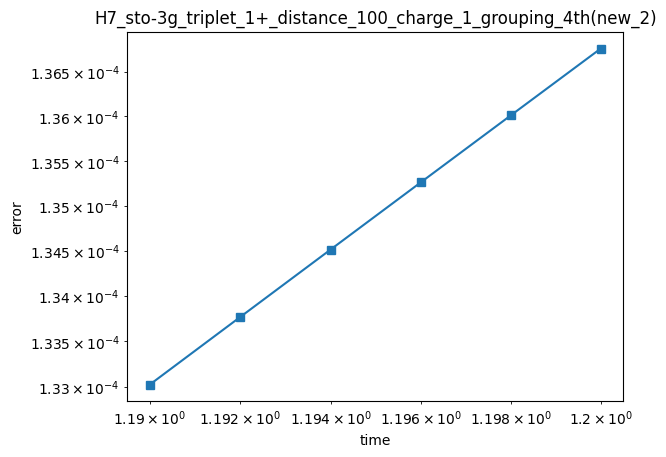

In [ ]:
import trotter_error_plt as tep

time_dir = {2:{0:0.73,1:2.21},3:{0:0.75,1:2.27},4:{0:0.37,1:1.12},5:{0:0.36,1:1.08},6:{0:0.25,1:1.25},7:{0:0.23,1:1.19}, 8:{0.18, 0.94}, 9:{0.18, 0.90}, 10:{0.15, 0.75}, 11:{0.14, 0.72}, 12:{0.12, 0.62}, 13:{0.12, 0.60}, 14:{0.10, 0.53}, 15:{0.10, 0.51}} # 初時間セット
dividing = 0.002 # ステップ幅

Hchain = 7 # H-chain
num_w = '4th(new_2)' # 使用積公式
storage = True # フィッティング α, p 保存可否

# フィッテング結果を保存する際はここを True にする
avestrage = True # フィッティング α (p 固定) 保存可否

if num_w == '8th(Morales)' or '10th(Morales)':
    s_time = time_dir[Hchain][1]
else:
    s_time = time_dir[Hchain][0]
e_time = s_time + 0.01
tep.trotter_error_plt_qc_gr(s_time, e_time, dividing, Hchain, num_w, storage, avestrage)

#### 同一 t に対して一括で複数のフィッティング用

H3_sto-3g_triplet_1+_distance_100_charge_1
energy_-1.234723024384624
error exponent :[2.1735086]
error coefficient :[0.00551517]
r^2 (log-log): 0.999999680603652
average_coeff:0.005252682528622554


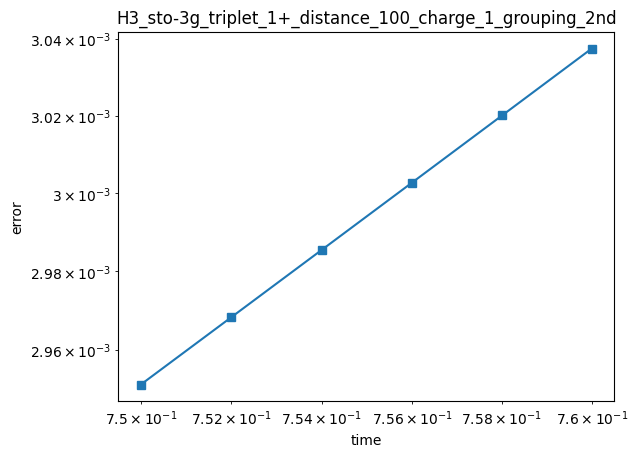

H3_sto-3g_triplet_1+_distance_100_charge_1
energy_-1.2347230243846241
error exponent :[3.83861286]
error coefficient :[0.00188435]
r^2 (log-log): 0.9999999683226097
average_coeff:0.001971788501588607


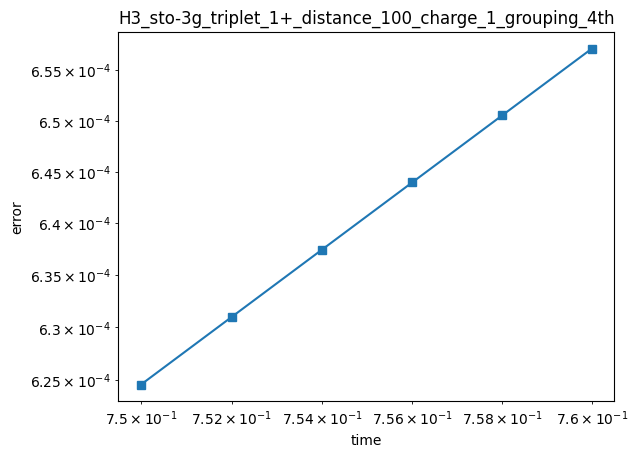

H3_sto-3g_triplet_1+_distance_100_charge_1
energy_-1.2347230243846214
error exponent :[6.38033549]
error coefficient :[0.00260206]
r^2 (log-log): 0.9999562186378663
average_coeff:0.004102134795320846


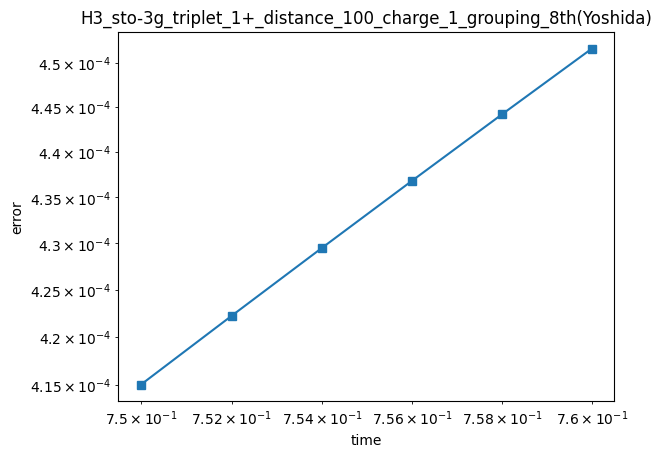

H3_sto-3g_triplet_1+_distance_100_charge_1
energy_-1.2347230243846254
error exponent :[3.90146941]
error coefficient :[2.79313712e-05]
r^2 (log-log): 0.9999999864435811
average_coeff:2.871565010090767e-05


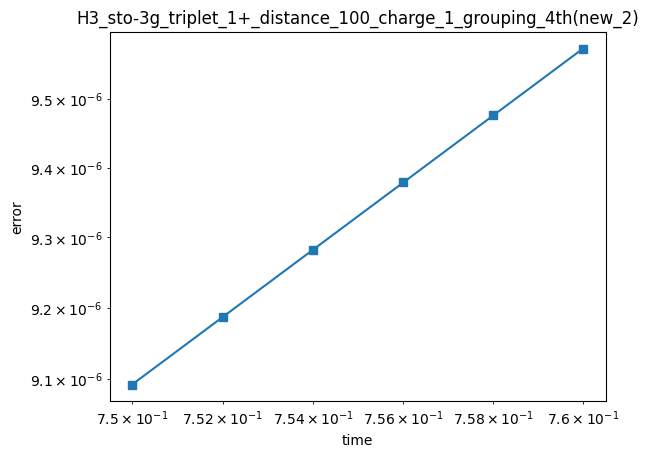

H3_sto-3g_triplet_1+_distance_100_charge_1
energy_-1.2347230243846257
error exponent :[7.93594561]
error coefficient :[8.46317442e-09]
r^2 (log-log): 0.9999999999846478
average_coeff:8.02933018886023e-09


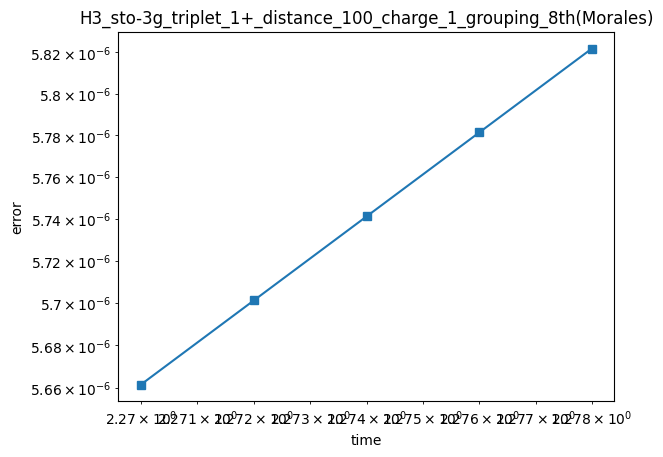

H3_sto-3g_triplet_1+_distance_100_charge_1
energy_-1.2347230243846243
error exponent :[9.55770955]
error coefficient :[1.32515688e-10]
r^2 (log-log): 0.9999999970915494
average_coeff:9.214301707126157e-11


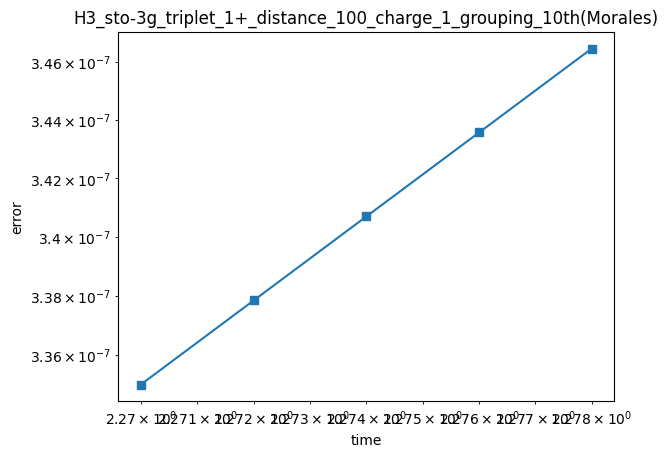

In [6]:
import trotter_error_plt as tep

time_dir = {2:{0:0.73,1:2.21},3:{0:0.75,1:2.27},4:{0:0.37,1:1.12},5:{0:0.36,1:1.08},6:{0:0.25,1:1.25},7:{0:0.23,1:1.19}} # 初時間セット
dividing = 0.002 # ステップ幅

Hchain = 3 # H-chain
storage = None # フィッティング α, p 保存可否
avestrage = None # フィッティング α (p 固定) 保存可否

num_w_list = ["2nd", "4th", "8th(Yoshida)", "4th(new_2)", "8th(Morales)","10th(Morales)"]
for num_w in num_w_list:
    if num_w == '8th(Morales)' or num_w == '10th(Morales)':
        s_time = time_dir[Hchain][1]
    else:
        s_time = time_dir[Hchain][0]
    e_time = s_time + 0.01
    tep.trotter_error_plt_qc_gr(s_time, e_time, dividing, Hchain, num_w, storage, avestrage)

### 摂動論による基底エネルギーの推定誤差(直接対角化との比較) (FIG.A.2)

converged SCF energy = -1.06610864931794
H2_sto-3g_singlet_distance_100_charge_0
error exponent :[2.0000125]
error coefficient :[0.00324142]
r^2 (log-log): 0.9999999999992941
average_coeff:0.0032412354976462366
H2_sto-3g_singlet_distance_100_charge_0
multiprocessing done
error exponent :2.000005255402992
error coefficient :0.003241300801204827
r^2 (log-log): 0.9999999999998619
average_coeff:0.0032412229565336723


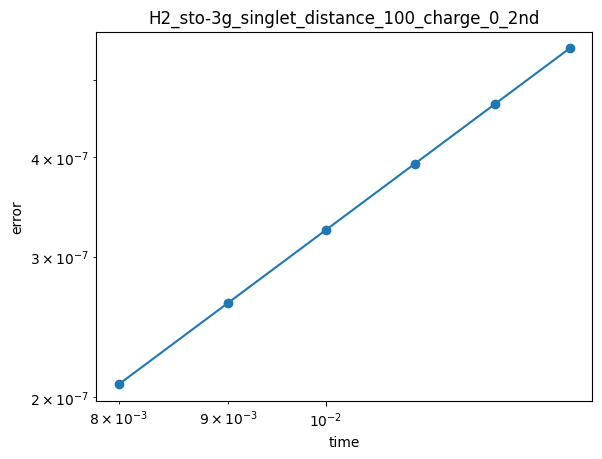

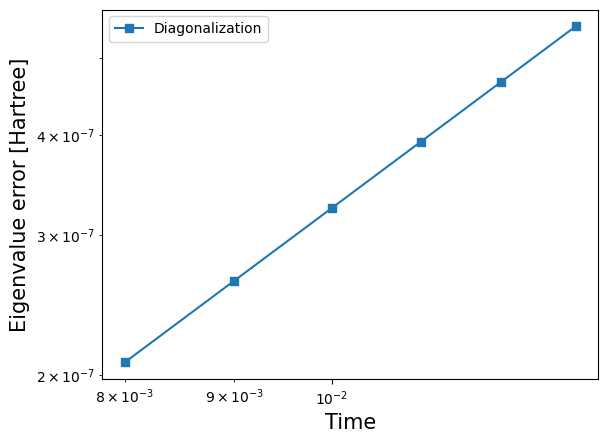

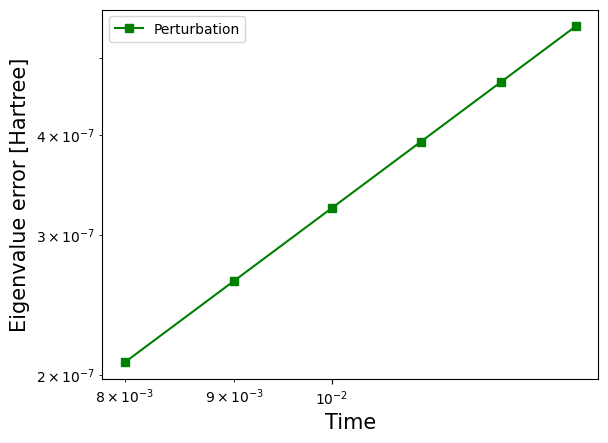

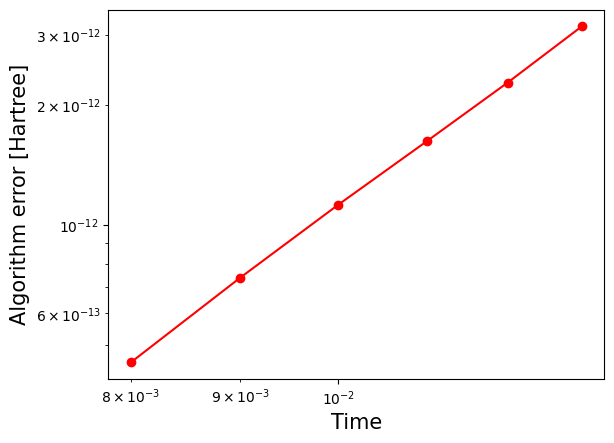

In [1]:
import trotter_error_plt as tep
s_time = 0.008 # 初時刻
e_time = 0.014 # 終時刻
dividing = 0.001 # ステップ幅
Hchain = 2 # H-chain
num_w = '2nd' # 使用積公式

tep.trotter_error_plt_qc(s_time, e_time, dividing, Hchain, num_w)

### extrapolation  (FIG.1)
H-chain の総計算量をプロットして、そのプロットを使って、外挿を行う。  
ディレクトリ "trotter_expo_coeff_gr" のスケーリング結果の $\alpha$ から総計算量を決定し、それに対して外挿する。  
そのため、変数 Hchain の原子数において上の Error plt でフィッティングを行っている必要がある。  
$H_2$ ~  $H_7$ ( $H_6, H_5$まででも可 ) までのフィッティングでも論文と同様の結果が得られる。  
フォルダ "trotter_expo_coeff_gr_original" には論文で使用している $H_{15}$ までのフィッティング結果を格納済み

H2_sto-3g_singlet_distance_100_charge_0
H3_sto-3g_triplet_1+_distance_100_charge_1
H4_sto-3g_singlet_distance_100_charge_0
H5_sto-3g_triplet_1+_distance_100_charge_1
H6_sto-3g_singlet_distance_100_charge_0
H7_sto-3g_triplet_1+_distance_100_charge_1
H8_sto-3g_singlet_distance_100_charge_0


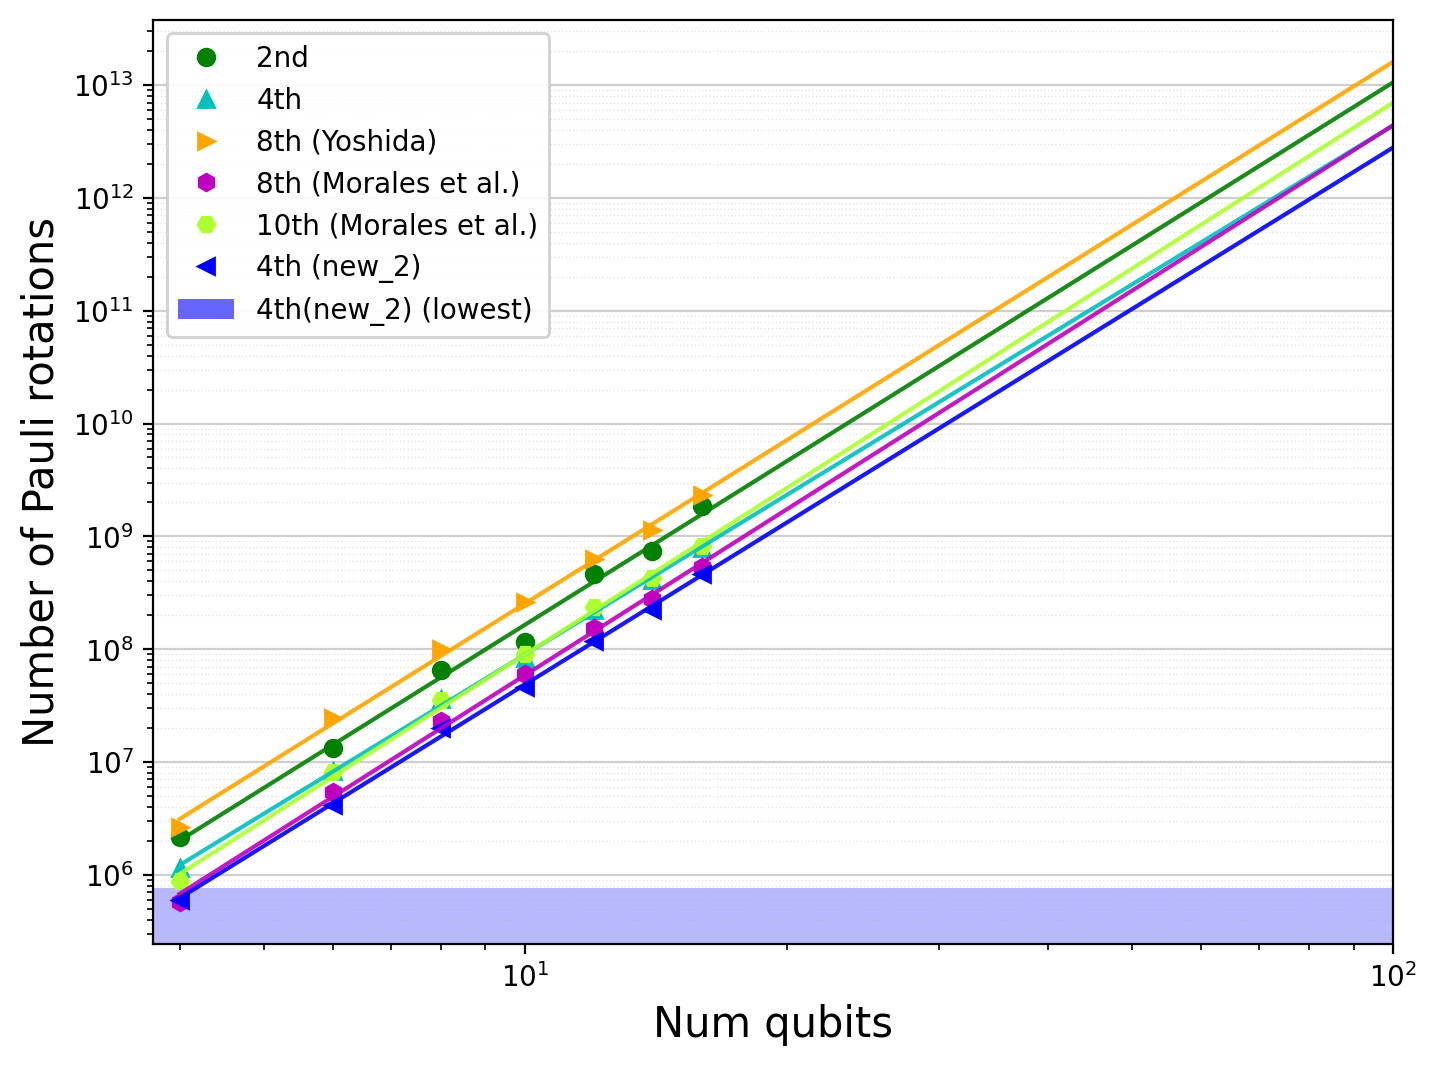

In [1]:
import trotter_error_plt as tep
Hchain = 8 # プロットを行う H-chain の原子数。上の Error plt でスケーリング済みの必要あり。
n_w_list = ['2nd', '4th', '8th(Yoshida)', '8th(Morales)', '10th(Morales)', '4th(new_2)'] # 比較するPF
tep.exp_extrapolation(Hchain, n_w_list, show_bands=True) # show_bands: 外挿の最小Fとなる PF の色帯をプロット下部に表示 

#### 2つの積公式の総ゲート数の差分を表示(FIG.2)

H2_sto-3g_singlet_distance_100_charge_0
H3_sto-3g_triplet_1+_distance_100_charge_1
H4_sto-3g_singlet_distance_100_charge_0
H5_sto-3g_triplet_1+_distance_100_charge_1
H6_sto-3g_singlet_distance_100_charge_0
H7_sto-3g_triplet_1+_distance_100_charge_1
H8_sto-3g_singlet_distance_100_charge_0
H9_sto-3g_triplet_1+_distance_100_charge_1
H10_sto-3g_singlet_distance_100_charge_0
H11_sto-3g_triplet_1+_distance_100_charge_1
H12_sto-3g_singlet_distance_100_charge_0
H13_sto-3g_triplet_1+_distance_100_charge_1
H14_sto-3g_singlet_distance_100_charge_0


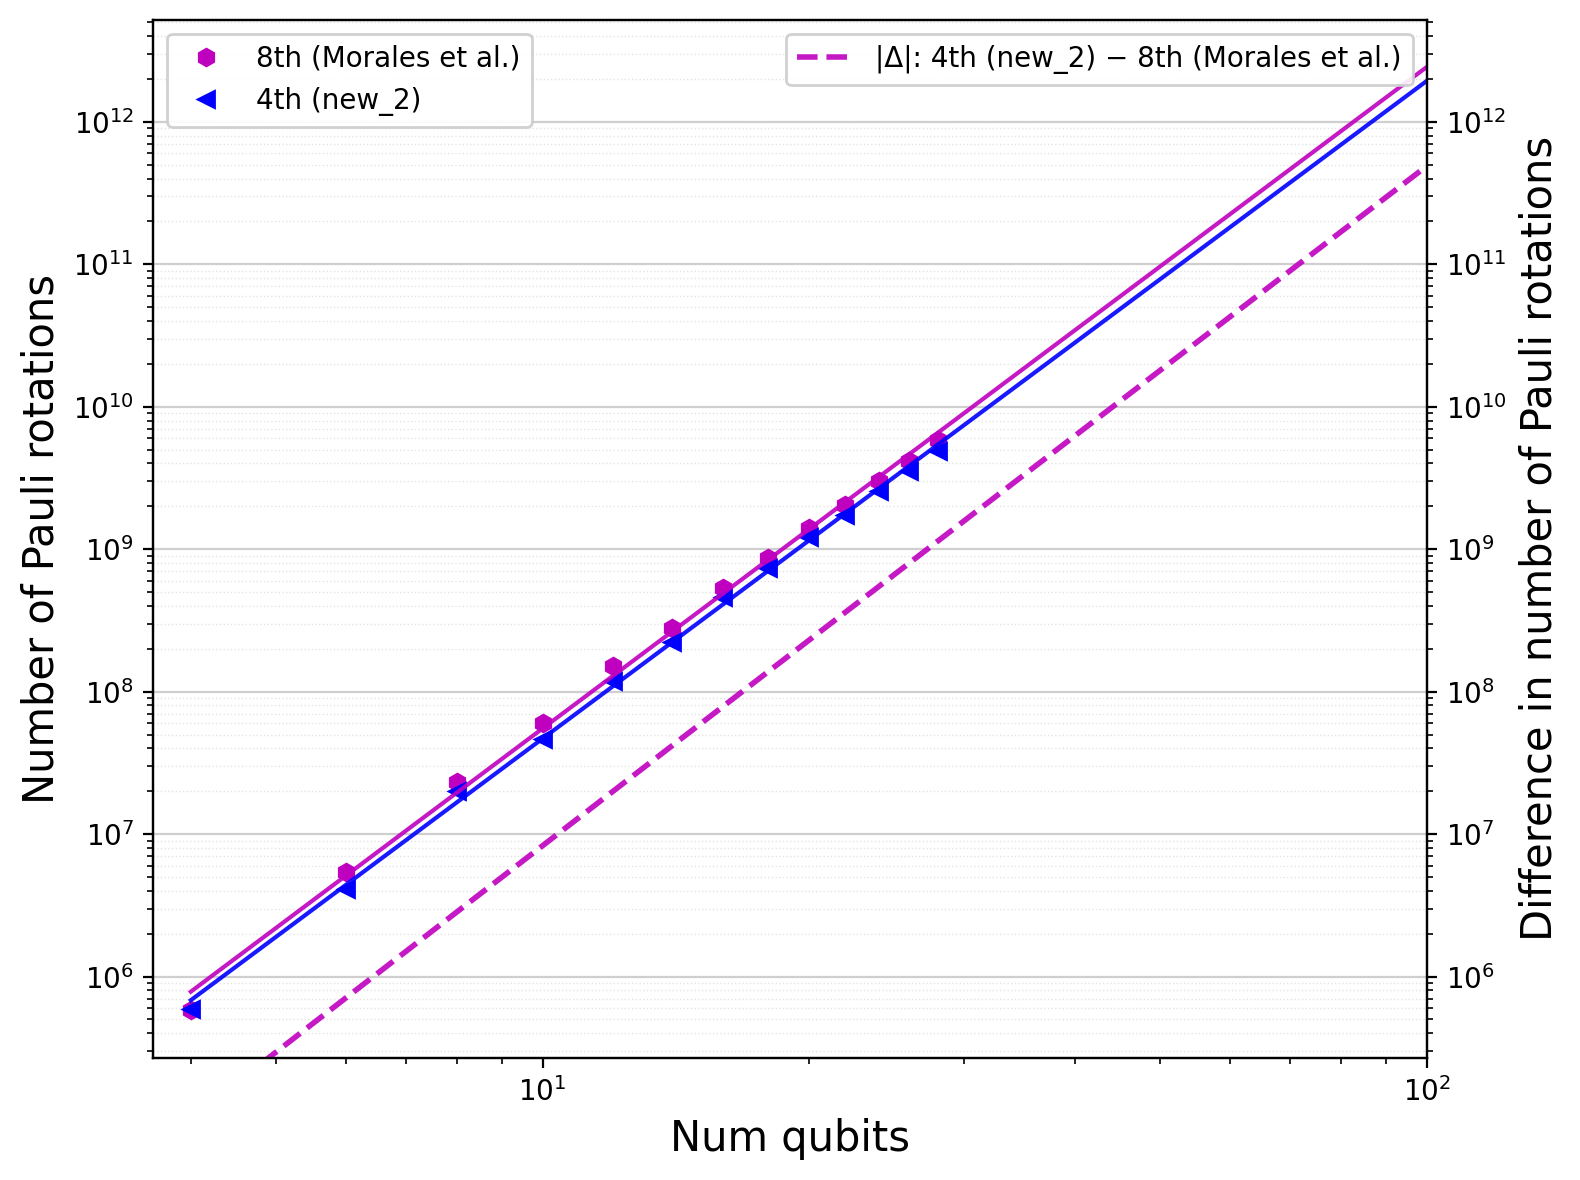

In [1]:
import trotter_error_plt as tep
Hchain = 14 # プロットを行う H-chain の原子数。上の Error plt でスケーリング済みの必要あり。
n_w_list = ['8th(Morales)', '4th(new_2)'] # 比較するPF 2つ
tep.exp_extrapolation_diff(Hchain, n_w_list) # show_bands: 外挿の最小Fとなる PF の色帯をプロット下部に表示 

#### 許容誤差(縦軸)ごとに最小ゲート数となる積公式(FIG.A.4, FIG.A.5)

H2_sto-3g_singlet_distance_100_charge_0
H3_sto-3g_triplet_1+_distance_100_charge_1
H4_sto-3g_singlet_distance_100_charge_0
H5_sto-3g_triplet_1+_distance_100_charge_1
H6_sto-3g_singlet_distance_100_charge_0
H7_sto-3g_triplet_1+_distance_100_charge_1
H8_sto-3g_singlet_distance_100_charge_0
H9_sto-3g_triplet_1+_distance_100_charge_1
H10_sto-3g_singlet_distance_100_charge_0
H11_sto-3g_triplet_1+_distance_100_charge_1
H12_sto-3g_singlet_distance_100_charge_0
H13_sto-3g_triplet_1+_distance_100_charge_1
['2nd', '8th (Morales et al.)', '4th (new_2)', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'CA']


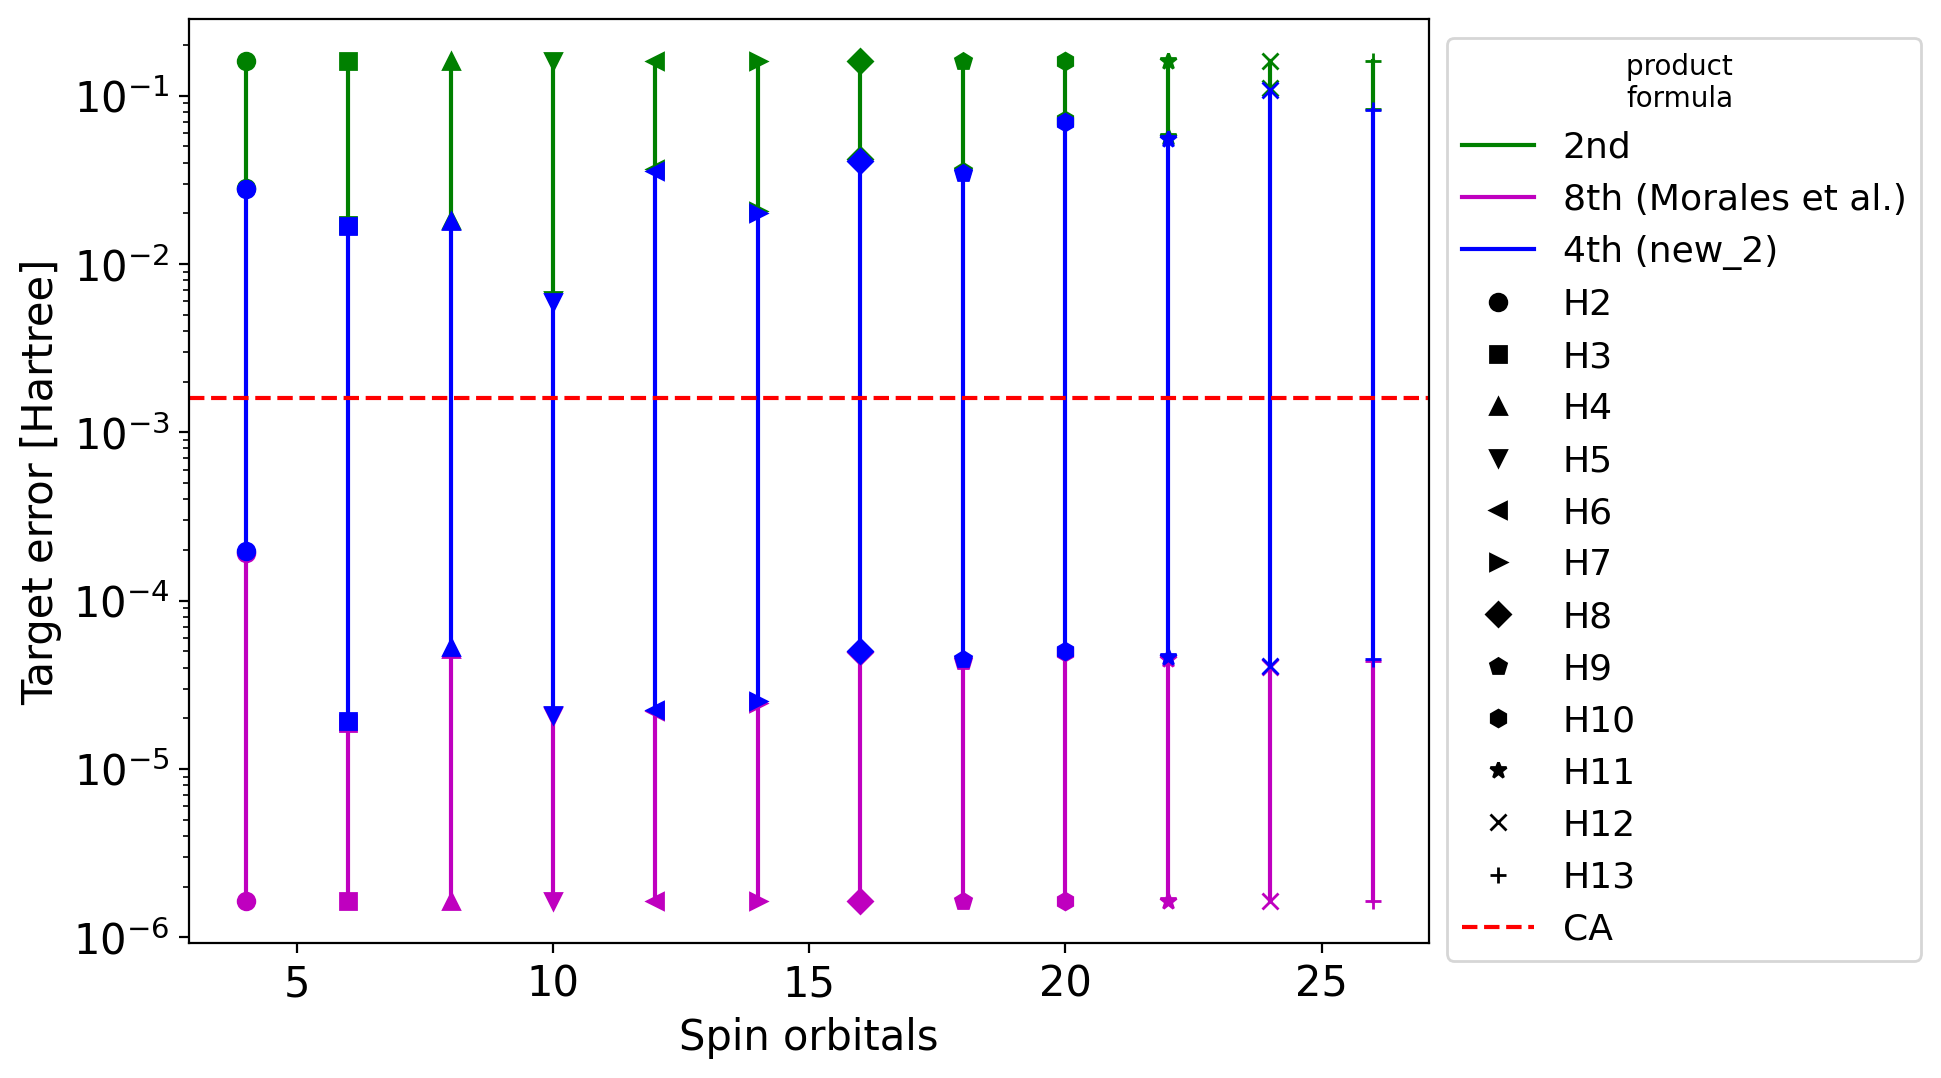

In [1]:
import trotter_error_plt as tep
n_w_list = ['2nd', '4th', '8th(Morales)', '8th(Yoshida)', '4th(new_3)', '4th(new_2)'] # 比較するPF
H_chain = 14
tep.efficient_accuracy_range_plt_grouper(H_chain, n_w_list)


### 積公式構築
$t^k$ までのテイラー展開で数値最適化を行い積公式のパラメータ[$w_1,...w_m$]を決定。残差が threshold より小さくなるパラメータを n_targets 個集めてその中で最も残差が小さいものを返す

In [ ]:
import optimal_trotter

best_w, best_total = optimal_trotter.parallel_find(m=2, k=4, n_targets=10, threshold=1e-17)
print(f"最良の optimalw: {best_w}")
print(f"対応する total: {best_total}") # 残差

最良の optimalw: [0.59499367 0.2943892 ]
対応する total: 1.0164395367051604e-18


#### 残差比較

In [ ]:
import numpy as np
import optimal_trotter

cand_search_best = {
    "name": "search_best",
    "w_free": [0.42008729, 0.40899193]
}

cand_known = {
    "name": "known_formula",
    "w_free": [0.29534665, 0.59302617]
}


results = optimal_trotter.compare_residuals(
    formulas=[cand_search_best, cand_known],
    k=5,
    sort_by="l2"   # L1ノルム(総誤差)が小さい順に並べる
)

for r in results:
    print("----", r["name"], "----")
    print("  L1 sum  :", r["l1"])
    print("  L2 norm :", r["l2"])
    print("  Linf max:", r["linf"])
    print("  w_free  :", r["w_free"])
    # 必要なら r["rest_vec"] (np.longdoubleでの項別のズレ) も見れる


---- search_best ----
  L1 sum  : 0.039866335337528945
  L2 norm : 0.008970465504813528
  Linf max: 0.004442794159854848
  w_free  : [0.42008729 0.40899193]
---- known_formula ----
  L1 sum  : 0.05445272786621607
  L2 norm : 0.012580145070478667
  Linf max: 0.0067086293029674
  w_free  : [0.29534665 0.59302617]


### $\beta$ スケーリング

#### スケーリング例 (FIG.A.1)

α (fixed) = 1.0
β (fitted) = 1.433


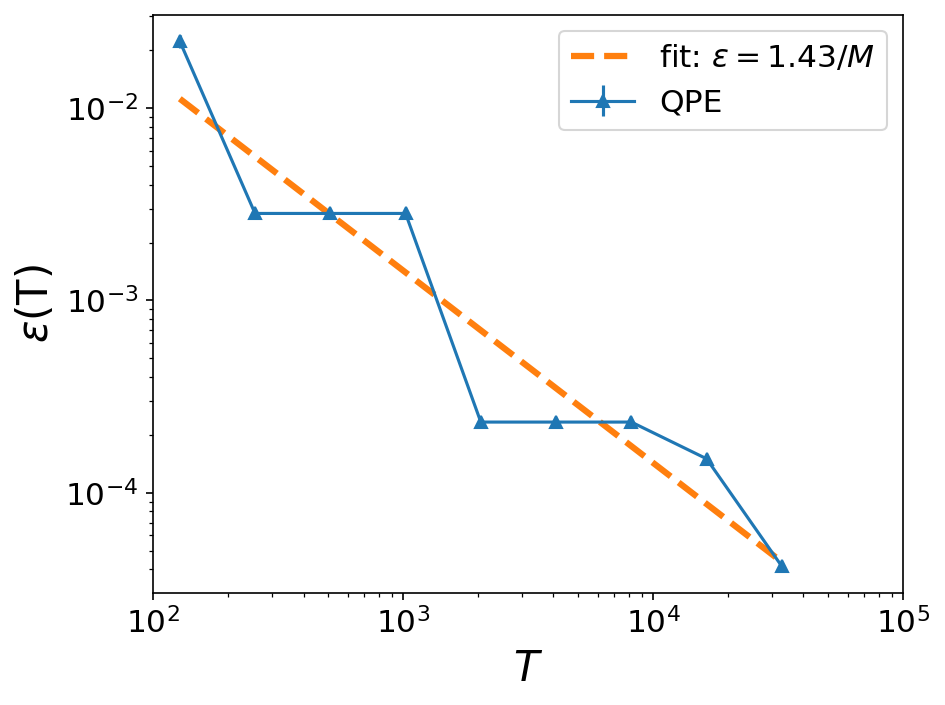

In [1]:
import trotter_error_plt as tep
import numpy as np
T_list_QPE = np.array([128,256,512,1024,2048,4096,8192,16384,32768]) # M
N_rep = 10       # 繰り返し回数
N_QPE = 100 # サンプリング数
initial_phi = [-1.5]
tep.beta_plt(T_list_QPE, N_rep, N_QPE, initial_phi)

#### ランダムな初期位相に対して得られる β の平均値

In [1]:
import trotter_error_plt as tep
import numpy as np
T_list_QPE = np.array([128,256,512,1024,2048,4096,8192,16384,32768]) # M
N_rep = 10       # 繰り返し回数
N_QPE = 100 # サンプリング数
tep.beta_scaling(T_list_QPE, N_rep, N_QPE)

Mean beta_fix over 100 trials: 1.20895827228886
Std  beta_fix over 100 trials: 0.48379796103054173
